### Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading and Preparing data

We will be using a very common dataset called CIFAR-10 that has 60,000 images (50,000 for training and 10,000 for testing) separated into 10 classes. The classes are as follows

* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

In [2]:
((x_train_full, y_train_full), (x_test, y_test)) = tf.keras.datasets.cifar10.load_data()

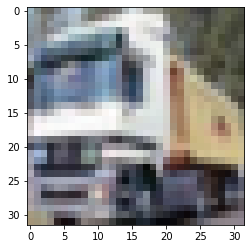

In [3]:
## Sample image

plt.imshow(x_train_full[:,:,:][1])

In [4]:
## Label of the above image

print(y_train_full[1])

[9]


Here the classes are labelled from 0-9, 0 being airplane and 9 being truck

In [5]:
x_train_full.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_train_full

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
## Normalizing the data

x_train = x_train_full[:40000] / 255
x_valid = x_train_full[40000:] / 255

x_test = x_test / 255

In [9]:
x_train.shape

(40000, 32, 32, 3)

In [10]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
## One hot encoding the labels

y_train_full = tf.keras.utils.to_categorical(y_train_full)
y_test = tf.keras.utils.to_categorical(y_test)

In [12]:
y_train = y_train_full[:40000]
y_valid = y_train_full[40000:]

In [13]:
y_train.shape

(40000, 10)

In [14]:
y_train.shape

(40000, 10)

### Model Building, Compiling, Training and Evaluating 

The first neural network we build will be the simplest, in that it has no hidden layers. It takes the image
and flatten it to a vector for the input, and then have 10 outputs, one for each class.

In [15]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [17]:
model1.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer="adam")

In [18]:
history1 = model1.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), verbose=True, shuffle=True)

Epoch 1/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9761 - accuracy: 0.3120 - val_loss: 1.9996 - val_accuracy: 0.3161
Epoch 2/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8876 - accuracy: 0.3466 - val_loss: 1.9180 - val_accuracy: 0.3404
Epoch 3/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8546 - accuracy: 0.3643 - val_loss: 1.9105 - val_accuracy: 0.3430
Epoch 4/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8436 - accuracy: 0.3693 - val_loss: 1.8227 - val_accuracy: 0.3621
Epoch 5/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8286 - accuracy: 0.3711 - val_loss: 1.8169 - val_accuracy: 0.3770
Epoch 6/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8115 - accuracy: 0.3812 - val_loss: 1.8916 - val_accuracy: 0.3532
Epoch 7/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8171 - accuracy: 0.3794 - val_loss: 1.8440 - val_accuracy:

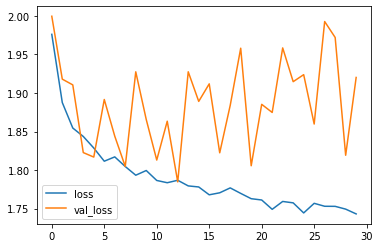

In [23]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['loss', 'val_loss'])

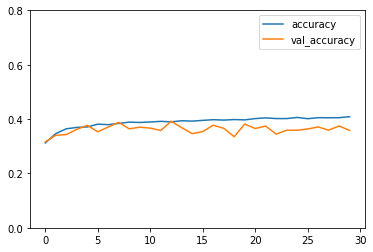

In [40]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.yticks(np.arange(0, 1, step=0.2))
plt.legend(['accuracy', 'val_accuracy'])

In [19]:
score1 = model1.evaluate(x_test, y_test)

print("Accuracy :", score1[1]*100)

313/313 [==============================] - 1s 3ms/step - loss: 1.8957 - accuracy: 0.3607
Accuracy : 36.07000112533569


With no hidden layers we managed to get about 33.26% accuracy on test set and 38% on the training set which was most likely to happen

The second neural network we build will be slightly more complicated in that it will have a hidden layer with 300
nodes and adds a non-linearity between the layers. It should use the following operations in this
order:

1. Flatten the image to a vector for the input
2. Use a fully-connected linear layer with 300 hidden-neurons
3. Use the ReLU activation function
4. Use a fully-connected linear layer to the 10 outputs.

In [25]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [26]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               921900    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 924,910
Trainable params: 924,910
Non-trainable params: 0
_________________________________________________________________


In [27]:
model2.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer="adam")

In [30]:
history2 = model2.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), verbose=True, shuffle=True)

Epoch 1/30
1250/1250 [==============================] - 6s 4ms/step - loss: 1.5173 - accuracy: 0.4602 - val_loss: 1.5706 - val_accuracy: 0.4436
Epoch 2/30
1250/1250 [==============================] - 6s 4ms/step - loss: 1.5035 - accuracy: 0.4663 - val_loss: 1.5890 - val_accuracy: 0.4439
Epoch 3/30
1250/1250 [==============================] - 6s 4ms/step - loss: 1.4984 - accuracy: 0.4675 - val_loss: 1.5734 - val_accuracy: 0.4426
Epoch 4/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4856 - accuracy: 0.4723 - val_loss: 1.5614 - val_accuracy: 0.4483
Epoch 5/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4819 - accuracy: 0.4727 - val_loss: 1.5528 - val_accuracy: 0.4560
Epoch 6/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4775 - accuracy: 0.4742 - val_loss: 1.5625 - val_accuracy: 0.4477
Epoch 7/30
1250/1250 [==============================] - 6s 4ms/step - loss: 1.4701 - accuracy: 0.4762 - val_loss: 1.5539 - val_accuracy:

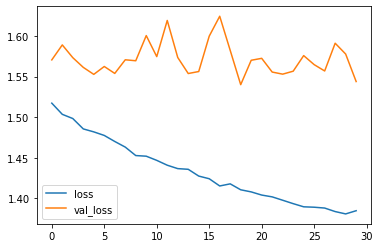

In [31]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['loss', 'val_loss'])

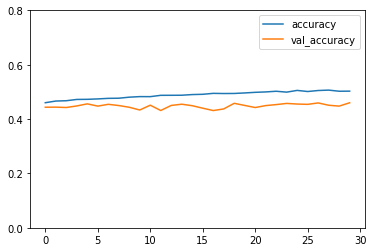

In [34]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.yticks(np.arange(0, 1, step=0.2))
plt.legend(['accuracy', 'val_accuracy'])

In [35]:
score2 = model2.evaluate(x_test, y_test)

print("Accuracy :", score2[1]*100)

313/313 [==============================] - 1s 4ms/step - loss: 1.5282 - accuracy: 0.4615
Accuracy : 46.149998903274536


Even after slightly increasing the complexity of the model we got around 41.12% accuracy on test set and and 46% on the training set which is not a huge improvement 

Finally to prove our point we will be building a simple convolutional neural network. It should use the following
operations in this order:
       
1. Use a convolution layer with kernel-width 5 and depth 25
2. Use the ReLU activation function
3. Use a max-pool operation with kernel-width 2 and stride 2
4. Flatten the image to a vector for the next step's input
5. Use a fully-connected linear layer to the 10 outputs.

In [36]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(25, kernel_size=5, input_shape=(32, 32, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [37]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 25)        1900      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 25)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4900)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                49010     
Total params: 50,910
Trainable params: 50,910
Non-trainable params: 0
_________________________________________________________________


In [38]:
model3.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer="adam")

In [39]:
history3 = model3.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5528 - accuracy: 0.4496 - val_loss: 1.3685 - val_accuracy: 0.5234
Epoch 2/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2898 - accuracy: 0.5514 - val_loss: 1.2678 - val_accuracy: 0.5641
Epoch 3/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1805 - accuracy: 0.5895 - val_loss: 1.1662 - val_accuracy: 0.6026
Epoch 4/30
1250/1250 [==============================] - 7s 5ms/step - loss: 1.1064 - accuracy: 0.6161 - val_loss: 1.2092 - val_accuracy: 0.5802
Epoch 5/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0483 - accuracy: 0.6378 - val_loss: 1.1157 - val_accuracy: 0.6238
Epoch 6/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0133 - accuracy: 0.6511 - val_loss: 1.1458 - val_accuracy: 0.6136
Epoch 7/30
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9731 - accuracy: 0.6647 - val_loss: 1.1215 - val_accuracy:

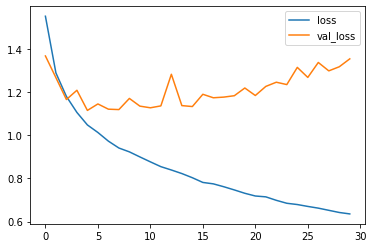

In [41]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.legend(['loss', 'val_loss'])

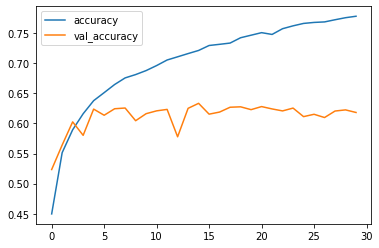

In [42]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])

In [43]:
score3 = model3.evaluate(x_test, y_test)

print("Accuracy :", score3[1]*100)

313/313 [==============================] - 1s 4ms/step - loss: 1.3792 - accuracy: 0.6025
Accuracy : 60.25000214576721


Clearly CNNs outperform ANNs when it comes to image classification tasks